<a href="https://colab.research.google.com/github/LordLean/Acquired-Intelligence-Adaptive-Behaviour/blob/master/AIAB_Labs/simple_agent_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def run(T,initial_pos,initial_bearing,geno,plot_flag):
    #runs a simple agent described by a geno and returns the trajectory
    #the light is at [0 0]

    #input
    #T is the time you want run it for
    #pos initial position
    #bearing initial bearing (degrees) e.g [90; 90]
    #geno genotype e.g [w_ll w_lr w_rl w_rr bl br]
    #plot_flag set to tru to output the figure

    #output a 2-d vector with the x and y coordinates
    
    #run a simple aget
    #geno = np.array([-1, 0, 0, -.4, 1, 0.5])
    #initial_pos = [1,1]
    #T=100
    #out  = simple_agent.run(T,initial_pos,90,geno,1)
    

    # Initial setup
    dt=0.05;
    R =0.05; #radius
    b = 45; #(degrees) sensor anglr

    print(geno[5])
    #conver geno params
    w_ll = geno[0]; #left motor to left sensor
    w_lr = geno[1]; #left motor to right sensor
    w_rl = geno[2]; #right motor to left sensor
    w_rr = geno[3]; #right motor to right sensor
    bl = geno[4];
    br = geno[5];
    sl_pos = np.zeros((2,1));
    sr_pos = np.zeros((2,1));
    
    rho=np.zeros((2, 1));
    sensor_gain = 1;
    motor_gain =1;
    vl=0;vr=0;
    #convert to radians
                                                
    initial_bearing = initial_bearing/360*2*np.pi;
    b=b/360*2*np.pi;
    
    pos = np.zeros((2,int(T/dt)));
    bearing = np.zeros((1,int(T/dt)));
    pos[:,0] = initial_pos;
    bearing[:,0] = initial_bearing;
    
   
    for i in range(1, int(T/dt)):
        vc = (vl+vr)/2;
        va = (vr-vl)/(2*R);
        pos[0,i] = pos[0,i-1]+ dt*vc*np.cos(bearing[0,i-1]);
        pos[1,i] = pos[1,i-1]+ dt*vc*np.sin(bearing[0,i-1]);
        bearing[0,i] = np.mod(bearing[0,i-1] + dt*va,2*np.pi);
        
        # Calculate left sensor position
        sl_pos[0] = pos[0,i] + R*np.cos(bearing[0,i]+b);
        sl_pos[1] = pos[1,i] + R*np.sin(bearing[0,i]+b);
        
        # Calculate right sensor position
        sr_pos[0] = pos[0,i] + R*np.cos(bearing[0,i]-b);
        sr_pos[1] = pos[1,i] + R*np.sin(bearing[0,i]-b);
    
        # Calculate (square) distance to element
        dl = np.sqrt((sl_pos[0])**2+(sl_pos[1])**2);
        dr = np.sqrt((sr_pos[0])**2+(sr_pos[1])**2);
    

        #  Calculate local intensity
        il = sensor_gain/dl;
        ir = sensor_gain/dr;

        lm = il*w_ll + ir*w_rl + bl;
        rm = il*w_lr + ir*w_rr + br;

        #  Scale by motor gains
        vl =motor_gain*lm;
        vr =motor_gain*rm;
     
    if plot_flag==1:
        plt.plot(pos[0,:],pos[1,:])
       
        #final postion
        x=pos[0,int(T/dt)-1];
        y= pos[1,int(T/dt)-1];
        f_bearing = bearing[0,int(T/dt)-1];

        # Calculate left sensor position
        sl_pos[0] = x + R*np.cos(f_bearing+b);
        sl_pos[1] = y + R*np.sin(f_bearing+b);

        # Calculate left sensor position
        sr_pos[0] = x + R*np.cos(f_bearing-b);
        sr_pos[1] = y + R*np.sin(f_bearing-b);
    
        plt.plot(0,0,marker='.',markersize=30,color='yellow');
        plt.plot(0,0,marker='o',markersize=10,color='black');
       
    # Plot  sensors
       #
        plt.plot(sl_pos[0],sl_pos[1],marker='.',markersize=10,color='red');
        plt.plot(sr_pos[0],sr_pos[1],marker='.',markersize=10,color='red');

    
        # Plot body
        plt.plot( x, y,marker='.',markersize=10,color='blue');
        plt.plot(x,y,marker='o',markersize=10,color='black');
        #Plot trajkectory
        plt.show()
        
    
    return pos

In [0]:
# geno[0]; #left motor to left sensor
# geno[1]; #left motor to right sensor
# geno[2]; #right motor to left sensor
# geno[3]; #right motor to right sensor

0.8


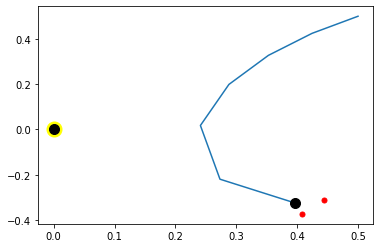

In [0]:
#@title Fear - Coward
# Ipsilateral, positive connections.
geno = np.array([1, 0, 0, 1, 0.5, 0.8])
initial_pos = [0.5,0.5]
T=0.4
bearing = 225
out = run(T,initial_pos,bearing,geno,1)

0.8


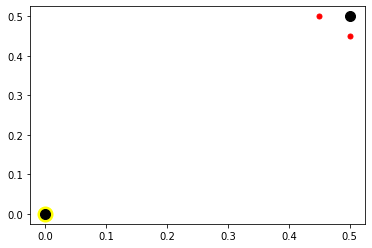

0.8


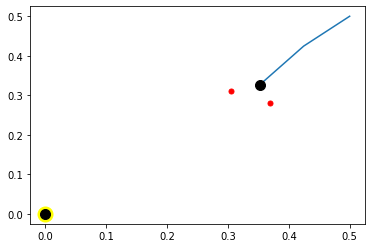

0.8


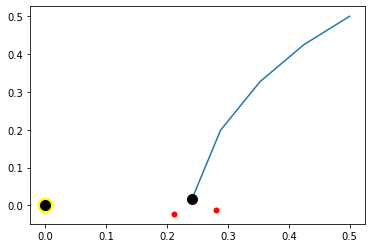

0.8


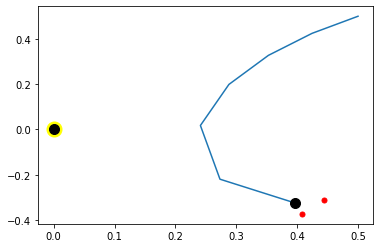

In [0]:
#@title Fear - Coward
# Ipsilateral, positive connections.
geno = np.array([1, 0, 0, 1, 0.5, 0.8])
initial_pos = [0.5,0.5]
bearing = 225
T =n p.arange(0.1,0.5,0.1)
out = [run(t,initial_pos,bearing,geno,1) for t in T]

1


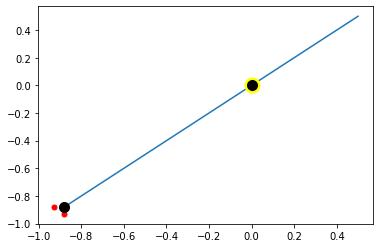

In [0]:
#@title Fear - Coward - Straight through Source.
# Ipsilateral, positive connections.
geno = np.array([1, 0, 0, 1, 1, 1])
initial_pos = [0.5,0.5]
T=0.4
bearing = 225
out = run(T,initial_pos,bearing,geno,1)

0.7


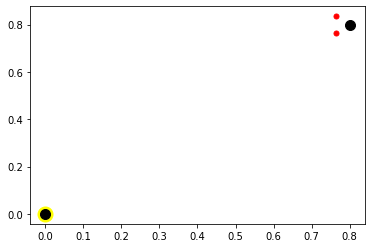

0.7


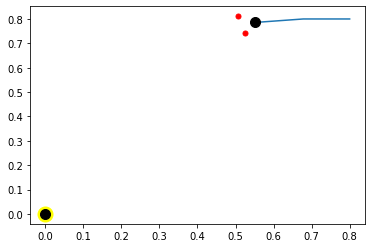

0.7


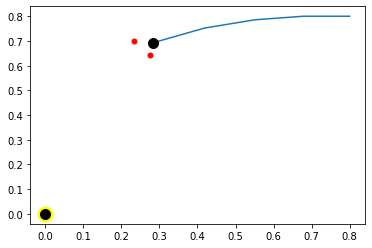

0.7


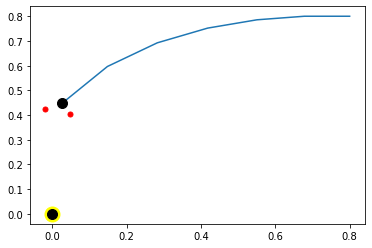

0.7


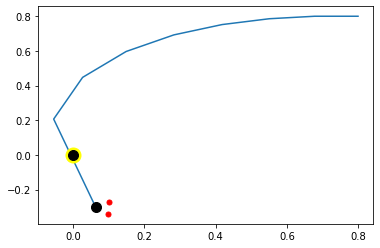

In [0]:
#@title Aggressor
# Contra-lateral, positive connections.
geno = np.array([0, 2, 1.5, 0, 1, 0.7])
initial_pos = [0.8,0.8]
T=np.arange(0.1,0.6,0.1)
bearing = 180
out = [run(t,initial_pos,bearing,geno,1) for t in T]

1


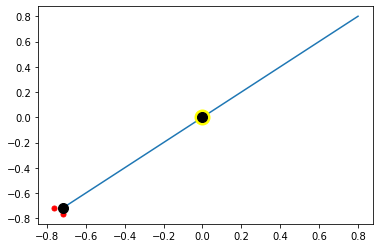

In [0]:
#@title Aggressor - Straight through Source.
# Contra-lateral, positive connections.
geno = np.array([0, 2, 2, 0, 1, 1])
initial_pos = [0.8,0.8]
T = 0.5
bearing = 225
out = run(T,initial_pos,bearing,geno,1)

3


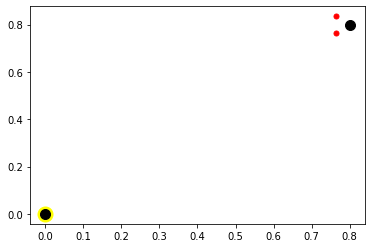

3


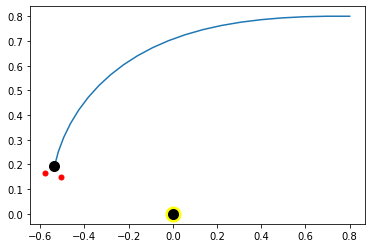

3


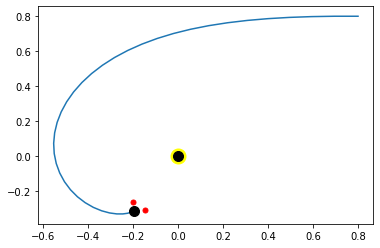

3


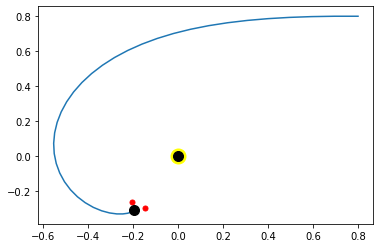

In [198]:
#@title Lover
# Contra-lateral, positive connections.
geno = np.array([-1, 0, 0, -1, 3, 3])
initial_pos = [0.8,0.8]
T = np.arange(0.1,4,1)
bearing = 180
out = [run(t,initial_pos,bearing,geno,1) for t in T]

3


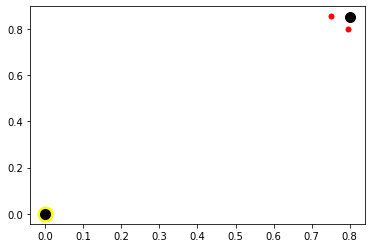

3


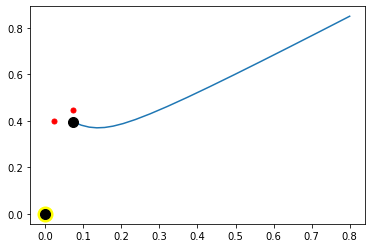

3


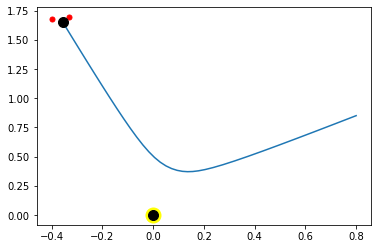

3


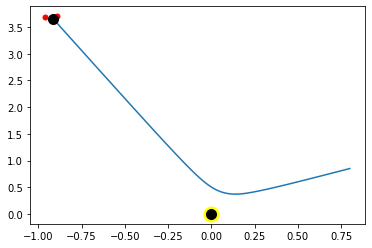

In [0]:
#@title Explorer
# Contra-lateral, positive connections.
geno = np.array([0, -1, -1, 0, 3, 3])
initial_pos = [0.8,0.85]
T = np.arange(0.1,3,0.8)
bearing = 220
out = [run(t,initial_pos,bearing,geno,1) for t in T]
# out = run(200,initial_pos,bearing,geno,1)

1


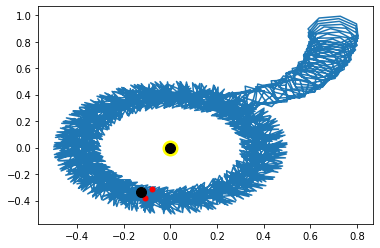

In [195]:
#@title One-Eyed Photo-taxis
# Contra-lateral, positive connections.
geno = np.array([1, 0, 1, 0, 1, 1])
initial_pos = [0.8,0.85]
bearing = 220
out = run(50,initial_pos,bearing,geno,1)

1


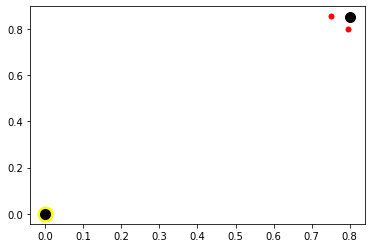

1


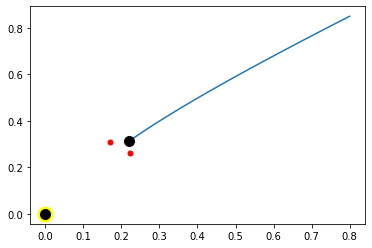

1


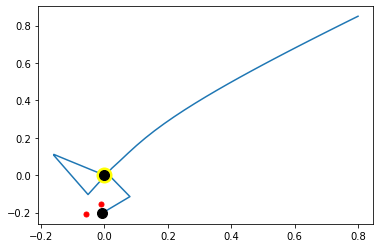

1


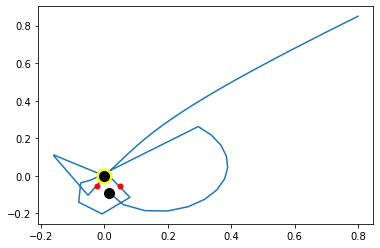

In [0]:
#@title One-Eyed Photo-taxis
# Contra-lateral, positive connections.
geno = np.array([-1, 0, 1, 0, 1, 1])
initial_pos = [0.8,0.85]
T = np.arange(0.1,3,0.8)
bearing = 220
out = [run(t,initial_pos,bearing,geno,1) for t in T]
# out = run(200,initial_pos,bearing,geno,1)